In [1]:
import pandas
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
data = pandas.read_csv("knn_data.csv")
cl=data.columns
X=data[cl[1:len(cl)-1]]
y=data['Rings']
print(X)
print(y)

      Male  Female  Infant    Length  Diameter    Height  Whole_weight  \
0      1.0     0.0     0.0  0.455000  0.365000  0.095000      0.514000   
1      1.0     0.0     0.0  0.350000  0.265000  0.090000      0.225500   
2      0.0     1.0     0.0  0.530000  0.420000  0.135000      0.677000   
3      1.0     0.0     0.0  0.440000  0.365000  0.125000      0.516000   
4      0.0     0.0     1.0  0.330000  0.255000  0.080000      0.205000   
5      0.0     0.0     1.0  0.425000  0.300000  0.095000      0.351500   
6      0.0     1.0     0.0  0.530000  0.415000  0.150000      0.777500   
7      0.0     1.0     0.0  0.545000  0.425000  0.125000      0.768000   
8      1.0     0.0     0.0  0.475000  0.370000  0.125000      0.509500   
9      0.0     1.0     0.0  0.550000  0.440000  0.172656      0.894500   
10     0.0     1.0     0.0  0.525000  0.385156  0.140000      0.606500   
11     1.0     0.0     0.0  0.430000  0.350000  0.110000      0.406000   
12     1.0     0.0     0.0  0.490000  

In [3]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.7, test_size=0.3, random_state=123) 
  
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)


0.7719298245614035
[[ 82  65   0   0]
 [ 22 882   1   0]
 [  1 169   4   0]
 [  0  26   2   0]]


In [4]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
accuracy = dtree_model.score(X_test, y_test) 
print(accuracy)
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
print(cm)

0.7727272727272727
[[ 88  59   0   0]
 [ 24 881   0   0]
 [  1 173   0   0]
 [  0  28   0   0]]


In [5]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
print(cm)

0.7767145135566188
[[ 80  67   0   0]
 [ 26 862  17   0]
 [  0 142  32   0]
 [  0  18  10   0]]


In [6]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 
print(cm)

0.43779904306220097
[[137   9   0   0   1]
 [165 406  27   0 307]
 [  3  81   6   0  84]
 [  0   7   0   0  21]
 [  0   0   0   0   0]]


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [8]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5542264752791068


In [10]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7216905901116427


In [11]:
import numpy as np
print(np.unique(y))
#One Hot Encode our Y:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
Y = encoder.fit_transform(y_train)


[1. 2. 3. 4. 5.]


In [12]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  0 147   0   0]
 [  0 905   0   0]
 [  0 174   0   0]
 [  0  28   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       147
         2.0       0.72      1.00      0.84       905
         3.0       0.00      0.00      0.00       174
         4.0       0.00      0.00      0.00        28

   micro avg       0.72      0.72      0.72      1254
   macro avg       0.18      0.25      0.21      1254
weighted avg       0.52      0.72      0.61      1254



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy = svclassifier.score(X_test, y_test) 
print(accuracy)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 75  72   0   0]
 [ 20 885   0   0]
 [  1 173   0   0]
 [  0  28   0   0]]
              precision    recall  f1-score   support

         1.0       0.78      0.51      0.62       147
         2.0       0.76      0.98      0.86       905
         3.0       0.00      0.00      0.00       174
         4.0       0.00      0.00      0.00        28

   micro avg       0.77      0.77      0.77      1254
   macro avg       0.39      0.37      0.37      1254
weighted avg       0.64      0.77      0.69      1254

0.7655502392344498


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy = svclassifier.score(X_test, y_test) 
print(accuracy)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 73  74   0   0]
 [ 14 870  21   0]
 [  0 165   9   0]
 [  0  24   4   0]]
              precision    recall  f1-score   support

         1.0       0.84      0.50      0.62       147
         2.0       0.77      0.96      0.85       905
         3.0       0.26      0.05      0.09       174
         4.0       0.00      0.00      0.00        28

   micro avg       0.76      0.76      0.76      1254
   macro avg       0.47      0.38      0.39      1254
weighted avg       0.69      0.76      0.70      1254

0.759170653907496


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
X=data[cl[1:len(cl)-1]]
y=data['Rings']

# Binarize the output
y = label_binarize(y, classes=[1,2,3,4,5])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))


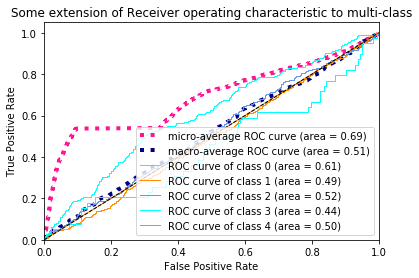

In [16]:
# Compute macro-average ROC curve and ROC area
lw=1
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()